# 💻 Lab 2 - Intro to Probabilistic Programming (Part 2 - PyMC basics)

# ❗❗❗ Very important administrative detail

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   **week 3 & week 4 - lab2**
*   ...

# Bayesian Methods for Hackers
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/tree/master

- Book with PyMC applications and discussions
- Jupyter notebooks for each chapter

# **PyMC** - Python library for Probabilistic Programing

Open -  https://www.pymc.io/welcome.html

In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")


## "Hello, world!" in PyMC - Tossing a coin

We toss a coin and infer its bias. Let's consider the following basic bayesian model for a coin toss:

$p \sim Uniform(0, 1)$ - the **prior** distribution

$toss \sim Bernoulli(p)$ - the **likelihood** distribution





# Simulation vs. Inference

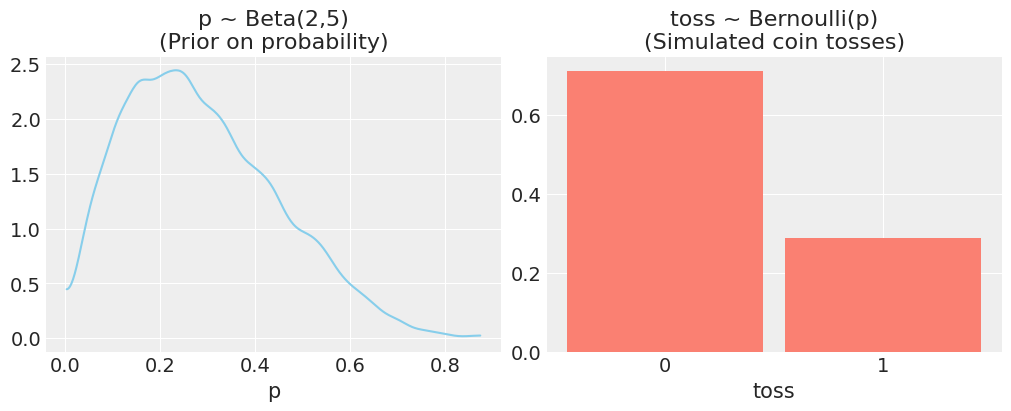

In [ ]:
with pm.Model():
    p = pm.Beta('p', 2, 5)
    toss = pm.Bernoulli('toss', p=p)

draws = pm.draw([p, toss], draws=10000)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

az.plot_dist(draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('p ~ Beta(2,5)\n(Prior on probability)')
axes[0].set_xlabel('p')

az.plot_dist(draws[1], ax=axes[1], kind='hist', color='salmon')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated coin tosses)')
axes[1].set_xlabel('toss')

plt.show()

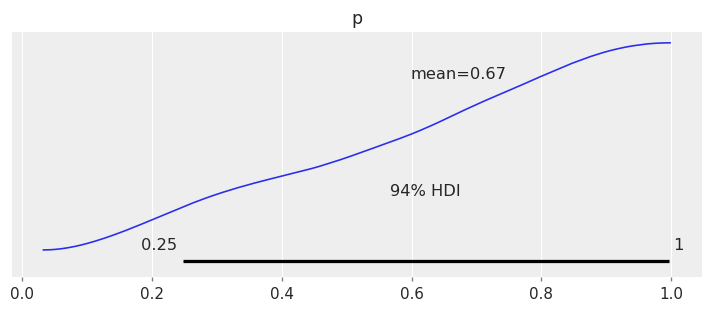

In [ ]:
# The experiment of tossing a coin leads to Heads
toss_data = [1]

with pm.Model() as model_ex0:
    #prior
    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # bayesian inference engine that samples from posterior
    # we will cover this in the next weeks
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

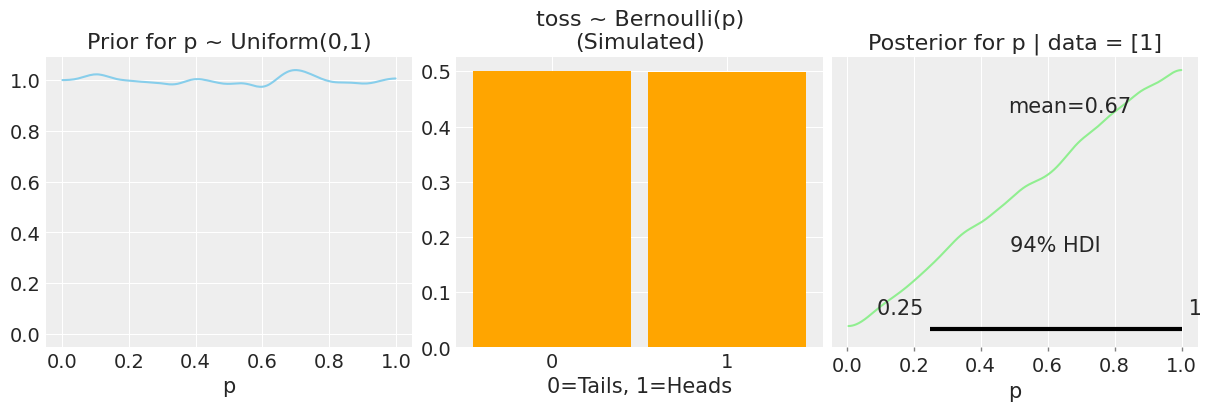

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


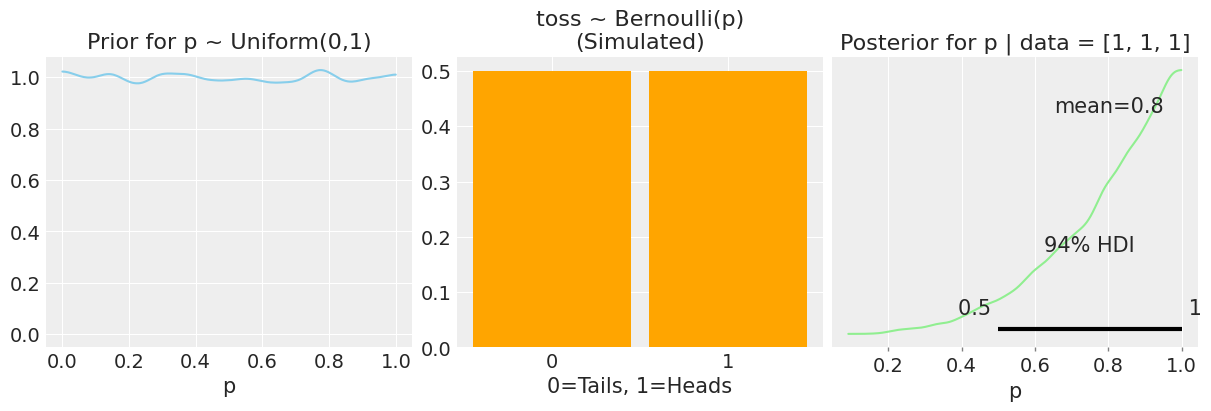

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


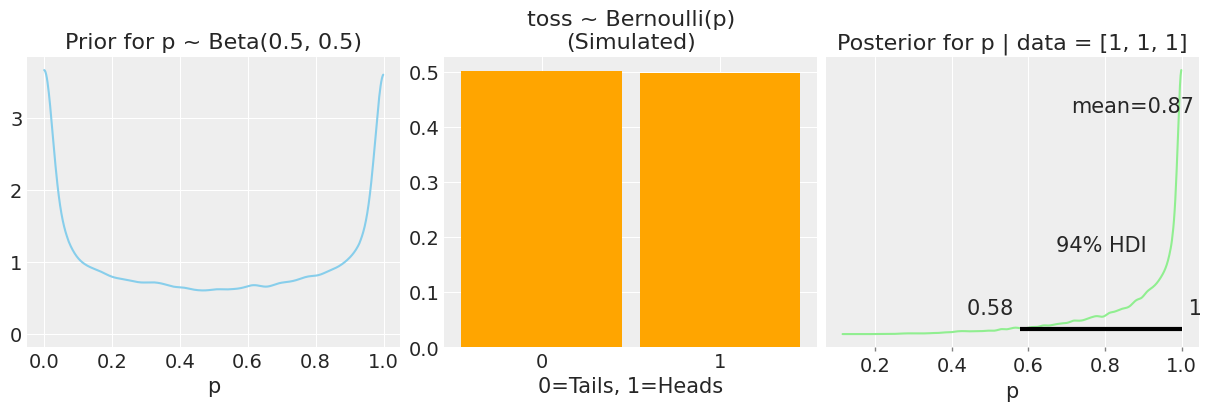

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Beta('p', alpha=0.5, beta=0.5)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(0.5, 0.5)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


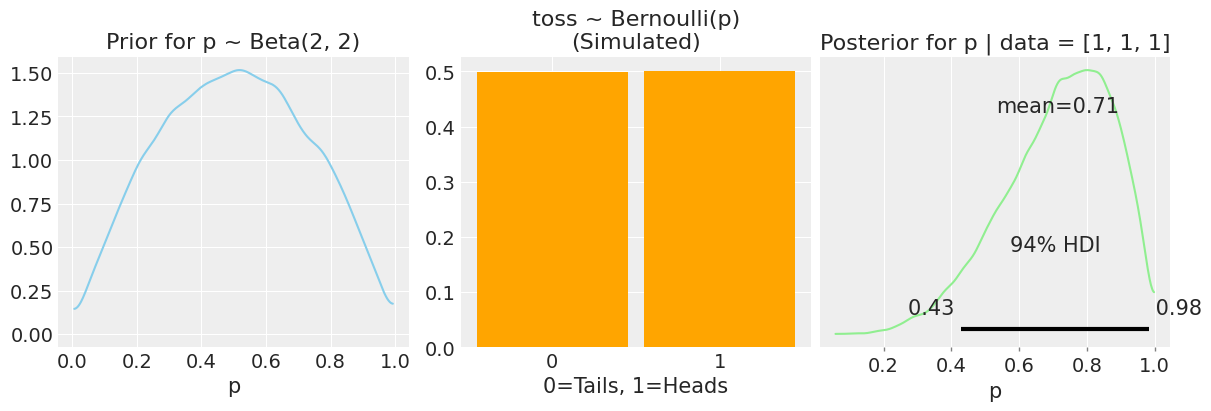

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Beta('p', alpha=2, beta=2)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(2, 2)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Let's use a sequence of throws. What is a proper likelihood distribution? We use a sequence of throws from a coin with true bias 0.25.

$p \sim Uniform(0, 1)$ - the **prior** distribution

$heads \sim Binomial(n, p)$ - the **likelihood** distribution

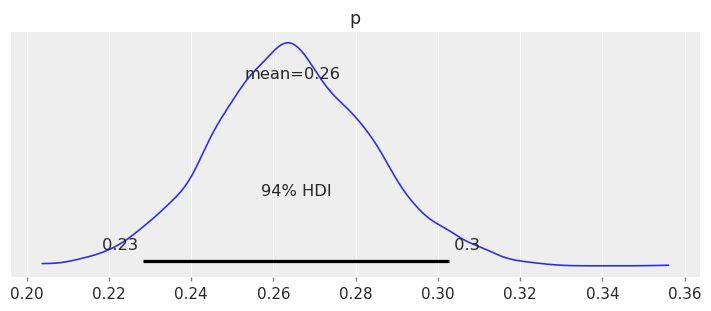

In [ ]:
toss_data = np.random.binomial(n=1, p=0.25, size=[500])

with pm.Model() as model_ex1:

    #prior
    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

    # bayesian inference engine that samples from posterior
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=2, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

Let's run the same model on an increasing number of coin tosses.

Run the following examples and monitor the posterior.

Coin bayesian model for 2 tosses


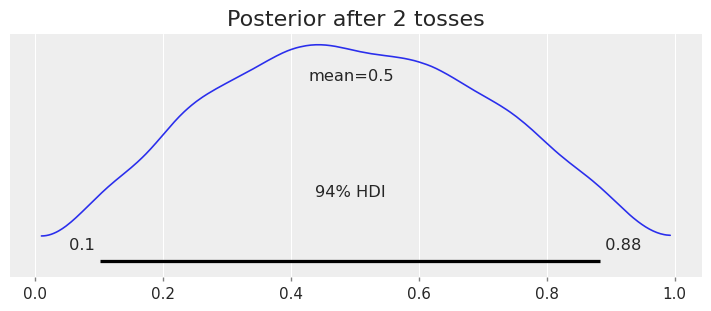

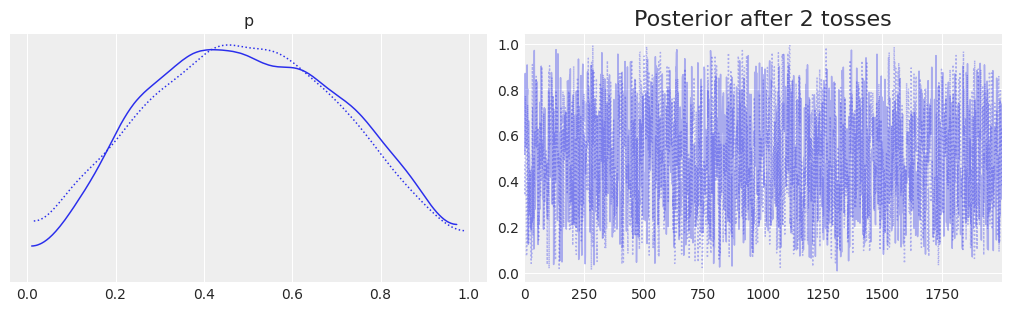

Coin bayesian model for 8 tosses


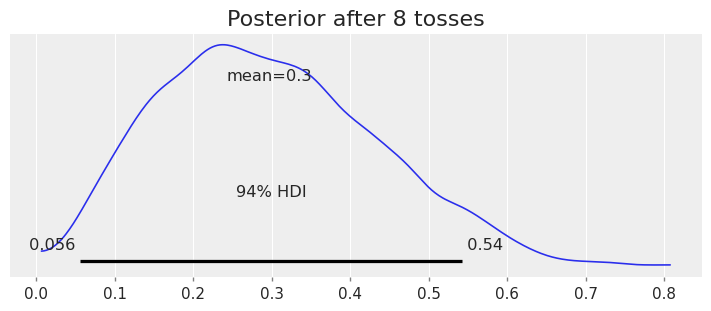

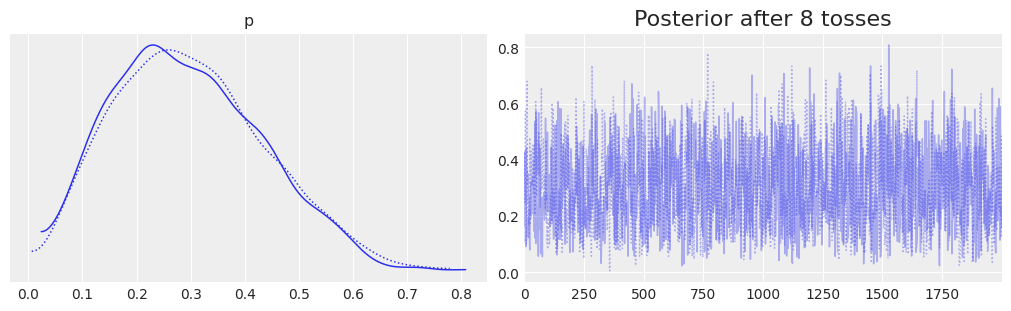

Coin bayesian model for 1000 tosses


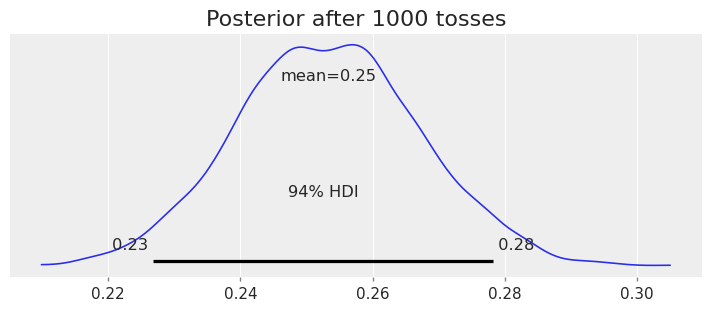

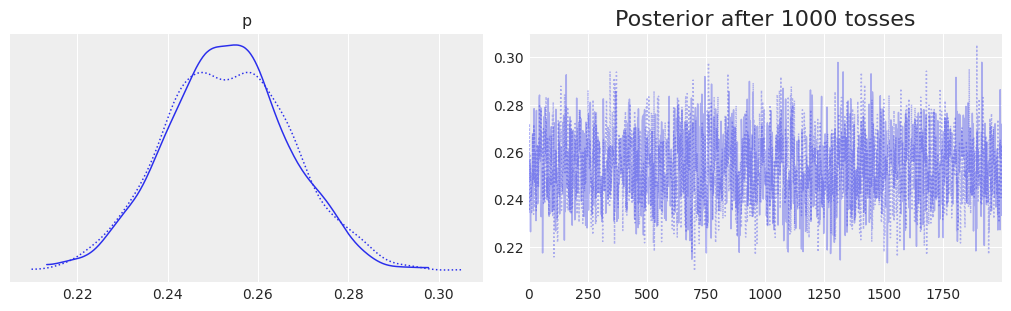

Coin bayesian model for 5000 tosses


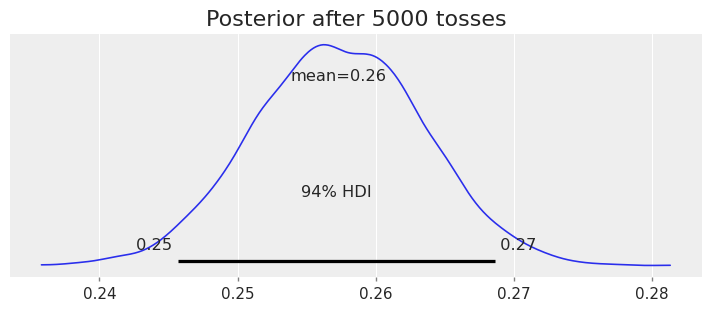

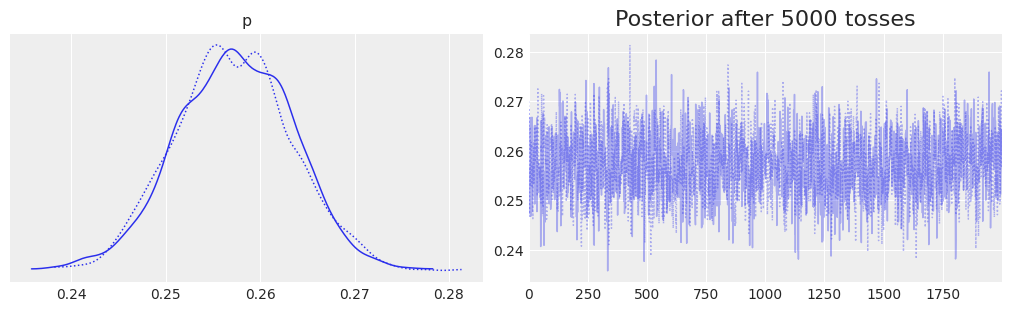

In [ ]:
tosses = {
    0: [0, 1],
    1: [0, 1, 0, 0, 0, 0, 1, 0],
    2: np.random.binomial(n=1, p=0.25, size=[1000]),
    3: np.random.binomial(n=1, p=0.25, size=[5000])
}

for _, toss_data in tosses.items():

    print(f"Coin bayesian model for {len(toss_data)} tosses")

    with pm.Model() as model_ex2:
        # prior
        p = pm.Uniform('p', lower=0, upper=1)

        #likelihood
        # toss = pm.Bernoulli('toss', p=p, observed=toss_data) # can we also use this?
        heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

        # bayesian inference engine that samples from posterior
        step = pm.NUTS()
        trace = pm.sample(2000, step=step, chains=2, progressbar=False)


    az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()

    az.plot_trace(trace, var_names=['p'], figsize=(10, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()


# Exercise 1 - Find the bias of the coin

❗ Remember from the previous lab that since Beta(1,1) looks like Uniform(0,1), then we can use it as prior distribution.

$p \sim Beta(1, 1)$

$heads \sim Binomial(n, p)$

Upload the file *coin_tosses.npy* in the notebook, follow the examples above to make your own beta-binomial model, and name it my_betabin. Plot the posterior using arviz or matplotlib.

*Extra: PyMC also has a built-in BetaBinomial distribution. Read the documentation and check to see similar results to your own my_betabin model*

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


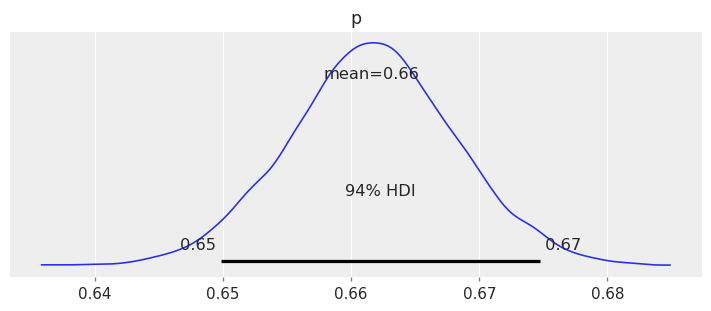

In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

toss_data = np.load("./data/coin_tosses.npy")

with pm.Model() as my_betabin:
    # prior
    p = pm.Beta("p", alpha=1, beta=1)

    # likelihood
    heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

    # bayesian inference engine that samples from posterior
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=4, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

# Exercise 2 - A/B Testing

Write a (complete) PyMC program to solve the following problem:
We have two website designs, called A and B. When a user lands on our website, we randomly show them design A or B, and record this assignment. After enough visitors have done this, we join this dataset against some metric of interest (typically, for websites, we are interested in a purchase or signup, call it conversion). For example, consider the following numbers:



```
visitors_to_A = 262
visitors_to_B = 127
conversions_from_A = 20
conversions_from_B = 13
```



What we are really interested in is the probability of conversion, given site A or B. As a business, we want this probability to be as high as possible. So, our goal is to determine which site, A or B, has a higher probability of conversion.

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 0 seconds.


Probability that design B is better than A: 0.822
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p_A    0.080  0.017   0.051    0.111        0.0      0.0    8344.0    5685.0   
p_B    0.109  0.027   0.061    0.161        0.0      0.0    8600.0    5894.0   
delta  0.029  0.032  -0.030    0.089        0.0      0.0    8599.0    6181.0   

       r_hat  
p_A      1.0  
p_B      1.0  
delta    1.0  


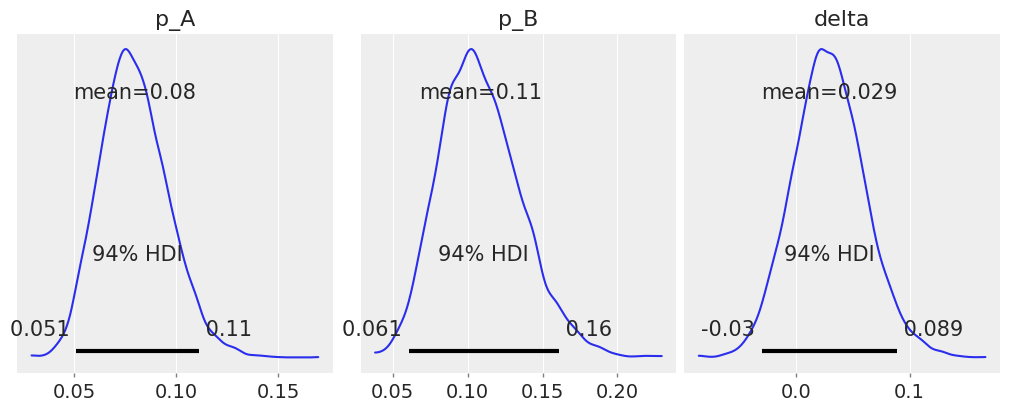

In [14]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

# What variables can be used to model this problem?

# You can measure the difference between the probabilities
# with a deterministic variable

visitors_to_A = 262
visitors_to_B = 127
conversion_from_A = 20
conversion_from_B = 13

with pm.Model() as my_betabin:
    # priors
    p_A = pm.Beta("p_A", alpha=1, beta=1)
    p_B = pm.Beta("p_B", alpha=1, beta=1)

    # likelihood
    records_A = pm.Binomial("records_A", n=visitors_to_A, p=p_A, observed=conversion_from_A)
    records_B = pm.Binomial("heads", n=visitors_to_B, p=p_B, observed=conversion_from_B)

    delta = pm.Deterministic("delta", p_B - p_A)

    # bayesian inference engine that samples from posterior
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=4, progressbar=False)

prob_B_better = np.mean(trace.posterior["delta"].values > 0)
print(f"Probability that design B is better than A: {prob_B_better:.3f}")

summary_df = az.summary(trace, var_names=["p_A", "p_B", "delta"])
print(summary_df)

az.plot_posterior(trace, var_names=["p_A", "p_B", "delta"], figsize=(10, 4))
plt.show()
plt.close()

# Exercise 3 - Heights

In the array heights.npy you will find a dataset of recorded heights in cm. Plot a histogram of the heights and decide on the best distribution to model them. Write a PyMC program to model the heights, plot the posterior distribution, and estimate the posterior distribution of the population mean height.

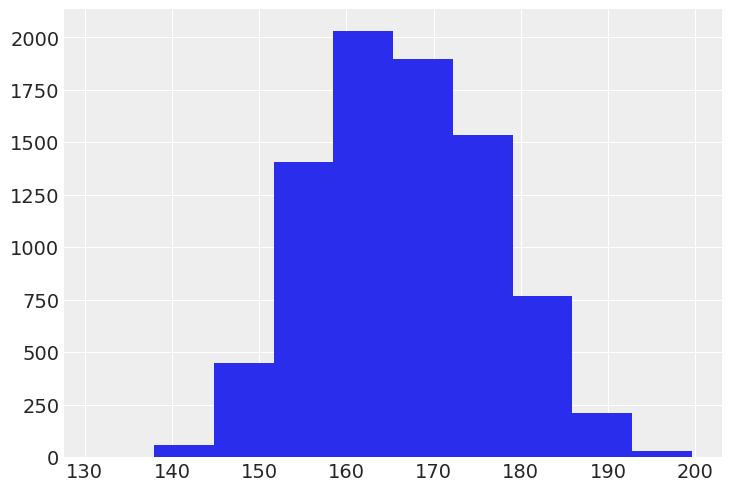

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


       mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu  166.642  0.112  166.428  166.849      0.001    0.001    7521.0    5585.0   

    r_hat  
mu    1.0  


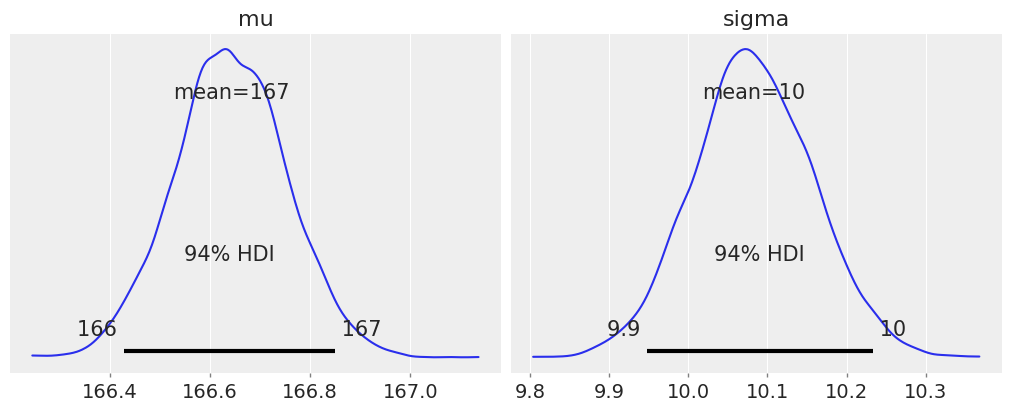

In [18]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

data = np.load("./data/heights.npy")

plt.hist(data)
plt.show()

with pm.Model() as heights_model:
    mu = pm.Normal("mu", mu=170, sigma=20)
    sigma = pm.HalfNormal("sigma", sigma=10)

    heights = pm.Normal("heights",  mu=mu, sigma=sigma, observed=data)

    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=4, progressbar=False)

summary_df = az.summary(trace, var_names=["mu"])
print(summary_df)

az.plot_posterior(trace, var_names=["mu", "sigma"], figsize=(10, 4))
plt.show()
plt.close()